# <u>CAPSTONE PROJECT</u> : <u> German Credit Risk Analysis </u>

##### Credit risk
Credit Risk is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations. If a company offers credit to its client,then there is a risk that its clients may not pay their invoices.

##### Types of Credit Risk
Good Risk: An investment that one believes is likely to be profitable. The term most often refers to a loan made to a creditworthy person or company. Good risks are considered exceptionally likely to be repaid.
Bad Risk: A loan that is unlikely to be repaid because of bad credit history, insufficient income, or some other reason. A bad risk increases the risk to the lender and the likelihood of default on the part of the borrower.

    In this project, we will be creating model to check if this loan credit would be a risk to the bank or not?

### Data description

The business meaning of each column in the data is as below

- **checking_status** - Status of existing checking account.
- **duration** - Duration of loan in months.
- **credit_history** - Credit history of the applicant.(credits taken, paid back duly, delays, critical accounts)
- **purpose** - Purpose for the loan. (car, television,...)
- **credit_amount** - Credit Amount
- **savings_status** - Status of savings account/bonds. (in Deutsche Mark)
- **employment** - Present employment. (in number of years)
- **installment_commitment** - Installment rate in percentage of disposable income.
- **personal_status** - Personal status (married, single,...) and sex.
- **other_parties** -  Other debtors / guarantors.
- **residence_since** - Present residence since X years
- **property_magnitude** - Property (e.g. real estate)
- **age** - Age. (in years)
- **other_payment_plans** - Other installment plans (banks, stores)
- **housing** - Housing (rent, own,...)
- **existing_credits** - Number of existing credits at this bank
- **job** - Job
- **num_dependents** - Number of people being liable to provide maintenance for
- **own_telephone** -  Is the Telephone registered or not (yes,no)
- **foreign_worker** - Is the applicant a foreign worker (yes,no)

In [42]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# pip install imblearn

In [71]:
# Reading the data
GermanCreditData = pd.read_csv('dataset_31_credit-g.csv')

# Sample Data
GermanCreditData.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [3]:
print("The dataset has {} credit records".format(len(GermanCreditData)))

The dataset has 1000 credit records


### <u>Missing values and Duplicate values Treatment

In [4]:
# Finding how many missing values are there for each column
GermanCreditData.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

#### Inference: 
Since there are no missing values in the data hence no changes are required.

In [5]:
# Removing duplicate rows if any
print('Shape before deleting duplicate values:', GermanCreditData.shape)

GermanCreditData=GermanCreditData.drop_duplicates()

print('Shape After deleting duplicate values:', GermanCreditData.shape)

Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


#### Inference: 
Since the shape of the dataframe remains the same before and after removing the duplicates. Hence there are no duplicate data present in the dataset.

In [6]:
GermanCreditData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

## <u>Defining the problem statement:
#### Create a Predictive model which can tell weather to approve a loan application or not?
#### Target Variable: class <br>
<i><b> Class - good ; means the loan was a good decision.<br> Class - bad  ; means the loan was a bad decision.<i><b>

## Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a supervised ML classification model, as the target variable is categorical.

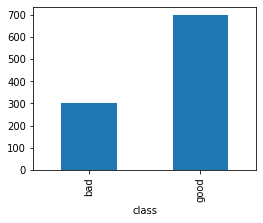

In [7]:
# Checking the distribution of target varibale.
GroupedData=GermanCreditData.groupby('class').size()
GroupedData.plot(kind='bar', figsize=(4,3))
plt.show()

##### Inference:
The data is imbalanced. We have lesser number of observations for 'Bad' Credit. There seems to be a need of Sampling.

### <u>Basic Data Exploration

In [8]:
GermanCreditData.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [9]:
GermanCreditData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [10]:
GermanCreditData.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,'no checking',NaN,'existing paid',radio/tv,NaN,'<100','1<=X<4',NaN,'male single',none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [11]:
# Finding unique values for each column
GermanCreditData.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

### <u>Plotting The Graph For The Attributes: <br>
Categorical variables: Bar plot <br>
Continuous variables: Histogram

#### Categorical Variable

In [12]:
# Function to Plot graphs

def PlotBarCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

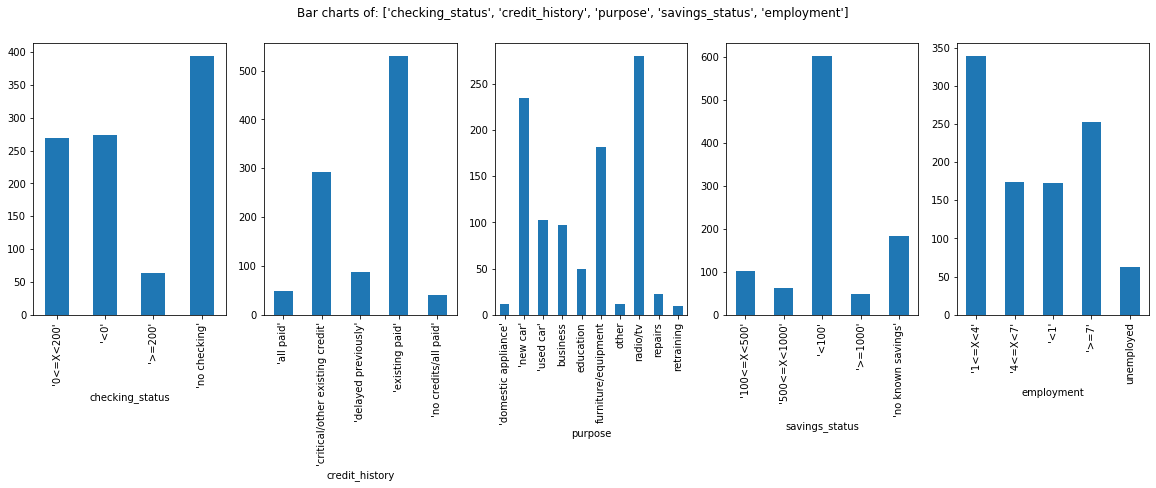

In [13]:
PlotBarCharts(inpData=GermanCreditData, 
              colsToPlot=['checking_status', 'credit_history', 'purpose','savings_status','employment'])

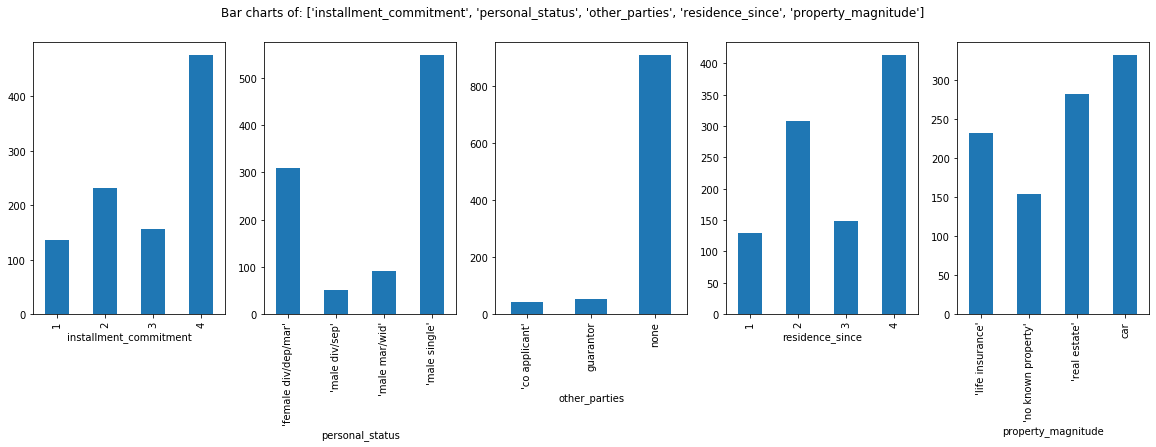

In [14]:
# Calling the function for 5 columns
PlotBarCharts(inpData=GermanCreditData, 
              colsToPlot=['installment_commitment', 'personal_status', 'other_parties','residence_since', 'property_magnitude'])

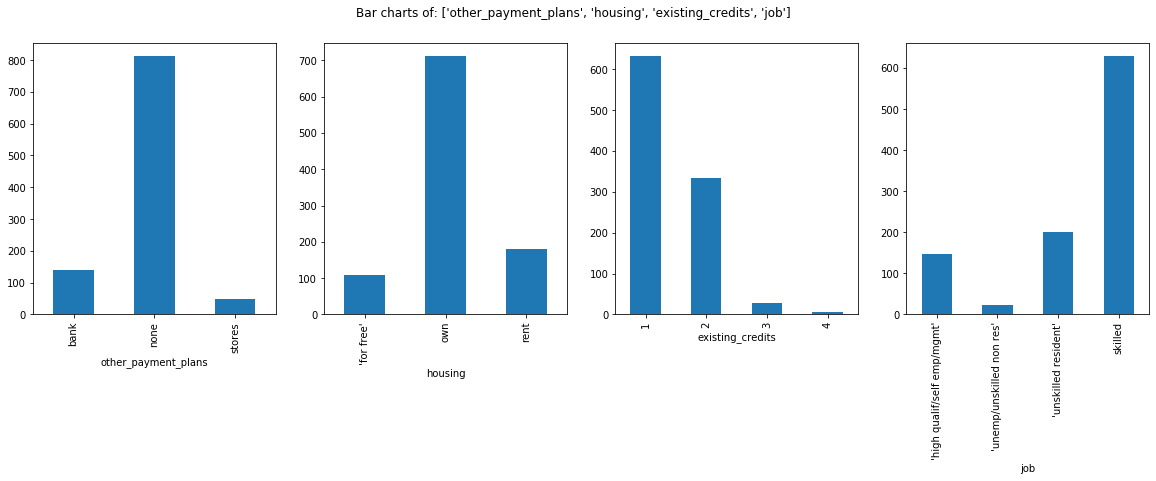

In [15]:
# Calling the function for 4 columns
PlotBarCharts(inpData=GermanCreditData, 
              colsToPlot=['other_payment_plans', 'housing', 'existing_credits', 'job'])

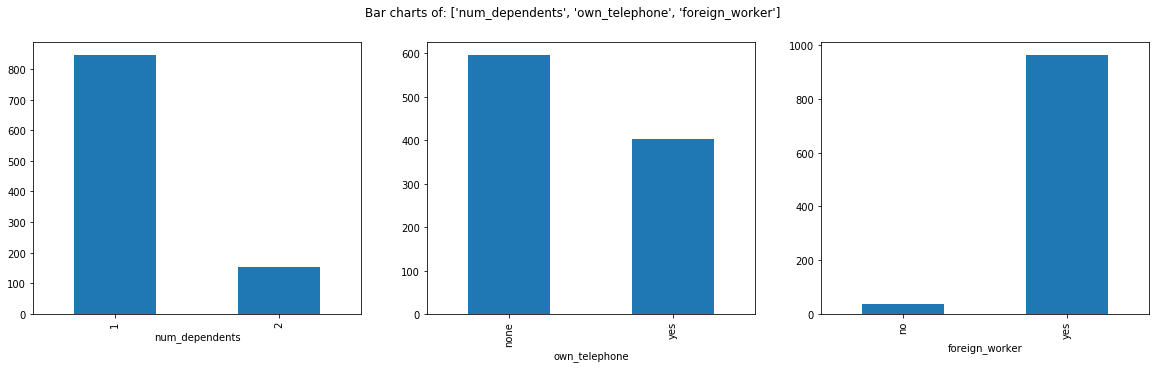

In [16]:
# Calling the function for 3 columns
PlotBarCharts(inpData=GermanCreditData, 
              colsToPlot=['num_dependents', 'own_telephone', 'foreign_worker'])

#### Inference: Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "property_magnitude" column where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution like "foreign_worker" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except "foreign_worker" and "other_parties" have satisfactory distribution for machine learning.

### Continuous Variable

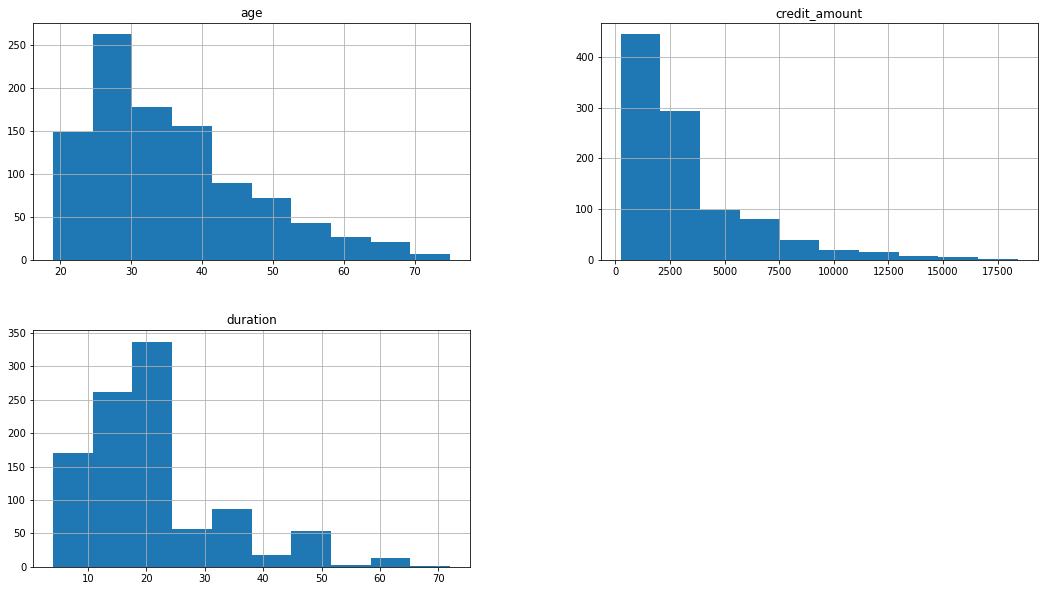

In [17]:
# Plotting histograms of multiple columns together
GermanCreditData.hist(['age', 'credit_amount','duration'], figsize=(18,10))
plt.show()

#### Inference: Histogram plots Interpretation
  Based on the Basic Data Exploration, there are three continuous predictor variables 'duration', 'credit_amount',and 'age'.
  Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "age", there are around 260 rows in data that has age between 25 to 30.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

### <u>Correlation and Heatmap

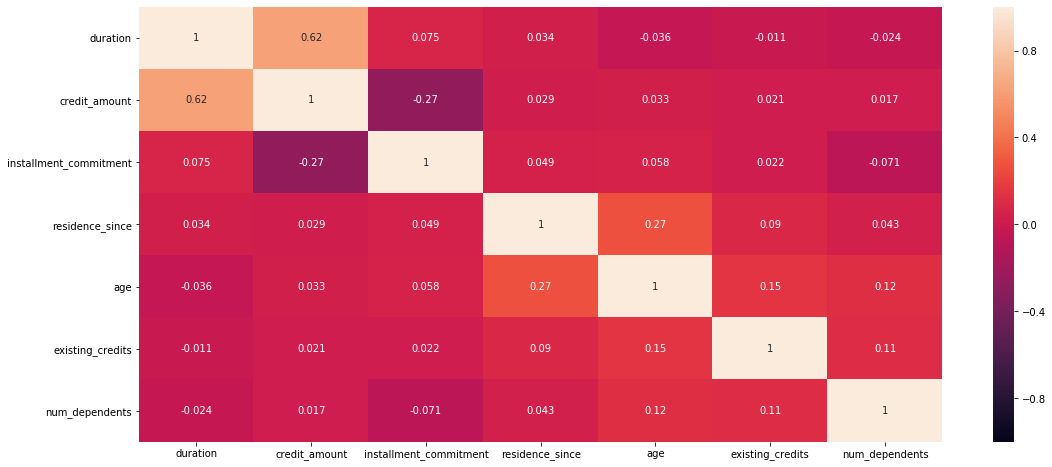

In [18]:
plt.figure(figsize=(18,8))
sns.heatmap(GermanCreditData.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

##### Inference

Duration and Credit_Amount are the parameters having highest positive correlation whereas installment_commitment and credit_amount are the parameters having highest negative correlation.

### <u>Outlier Treatment

In [19]:
skew_age = GermanCreditData['age'].skew()
skew_credit_amt = GermanCreditData['credit_amount'].skew()
skew_duration = GermanCreditData['duration'].skew()
print('Skewness: ','\nAge: ',skew_age,'\nCredit Amount: ', skew_credit_amt,'\nDuartion: ',skew_duration)

Skewness:  
Age:  1.0207392686768317 
Credit Amount:  1.9496276798326209 
Duartion:  1.0941841715555418


#### Inference:
As we can see the 'Age' and 'Duration' has Skewness nearly equal to 1. But 'Credit Amount' has Skewness value more than 1 hence we do 'SQRT' Transformation of the Credit Amount column.

In [20]:
print('Skewness value of Credit Amount after SQRT transformation: ', np.sqrt(GermanCreditData['credit_amount']).skew())

Skewness value of Credit Amount after SQRT transformation:  1.0403563150718032


#### Inference:
After the SQRT transformation we can see the Skewness value of the Credit Amount comes to be 1.04

### <u>Visual exploration of relationship between variables</u>

##### Relationship exploration: Categorical Vs Continuous -- Box Plots

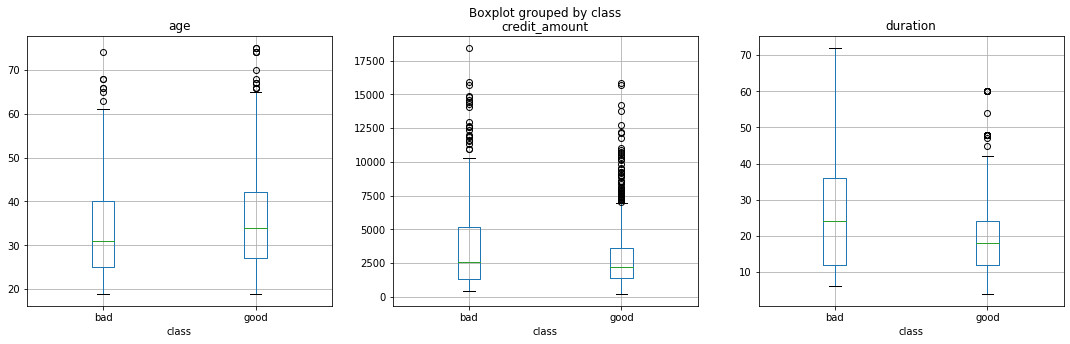

In [21]:
# Box plots for Categorical Target Variable "Class" and continuous predictors
ContinuousColsList=['age','credit_amount', 'duration']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Class"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    GermanCreditData.boxplot(column=PredictorCol, by='class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### Interpretation
The first chart "age" Vs "class". The boxes has similar bandwidth. It means that people whose loan was rejected and whose loan was approved have same kind of age. Hence, we cannot distinguish between approval and rejection based on the age of an applicant. So this column is NOT correlated with the GoodCredit.

But the other two charts shows significant difference in the Bandwidths, hence "credit_amount" and "duration" are correlated with the target variable.

We can confirm this by looking at the results of ANOVA test below.

### <u>Statistical Feature Selection using ANOVA test</u>
Analysis of variance(ANOVA) is performed to check the test of mean in the continuous variables.

##### Hypothesis:
H0: There is NO relation between the given variables (i.e. The average values of the numeric Predictor variable is same for all the groups in the categorical Target variable)

Ha: There is some relation between the given variables. 

In [22]:
ContinuousVariables=['age', 'credit_amount','duration']
SelectedPredictors = []

for i in ContinuousVariables:
    CategoryGroupLists = GermanCreditData.groupby('class')[i].apply(list)
    test_stats , p_val = f_oneway(*CategoryGroupLists)

    if(p_val < 0.05):
        SelectedPredictors.append(i)

        
SelectedPredictors

['age', 'credit_amount', 'duration']

The results of ANOVA confirm our visual analysis using box plots above!

The P-Value of "age", it is just at the boundry of the threshold, while the other two P-Values are clearly zero, hence they are correlated without doubt.

All three columns are correlated with Target Variable.

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

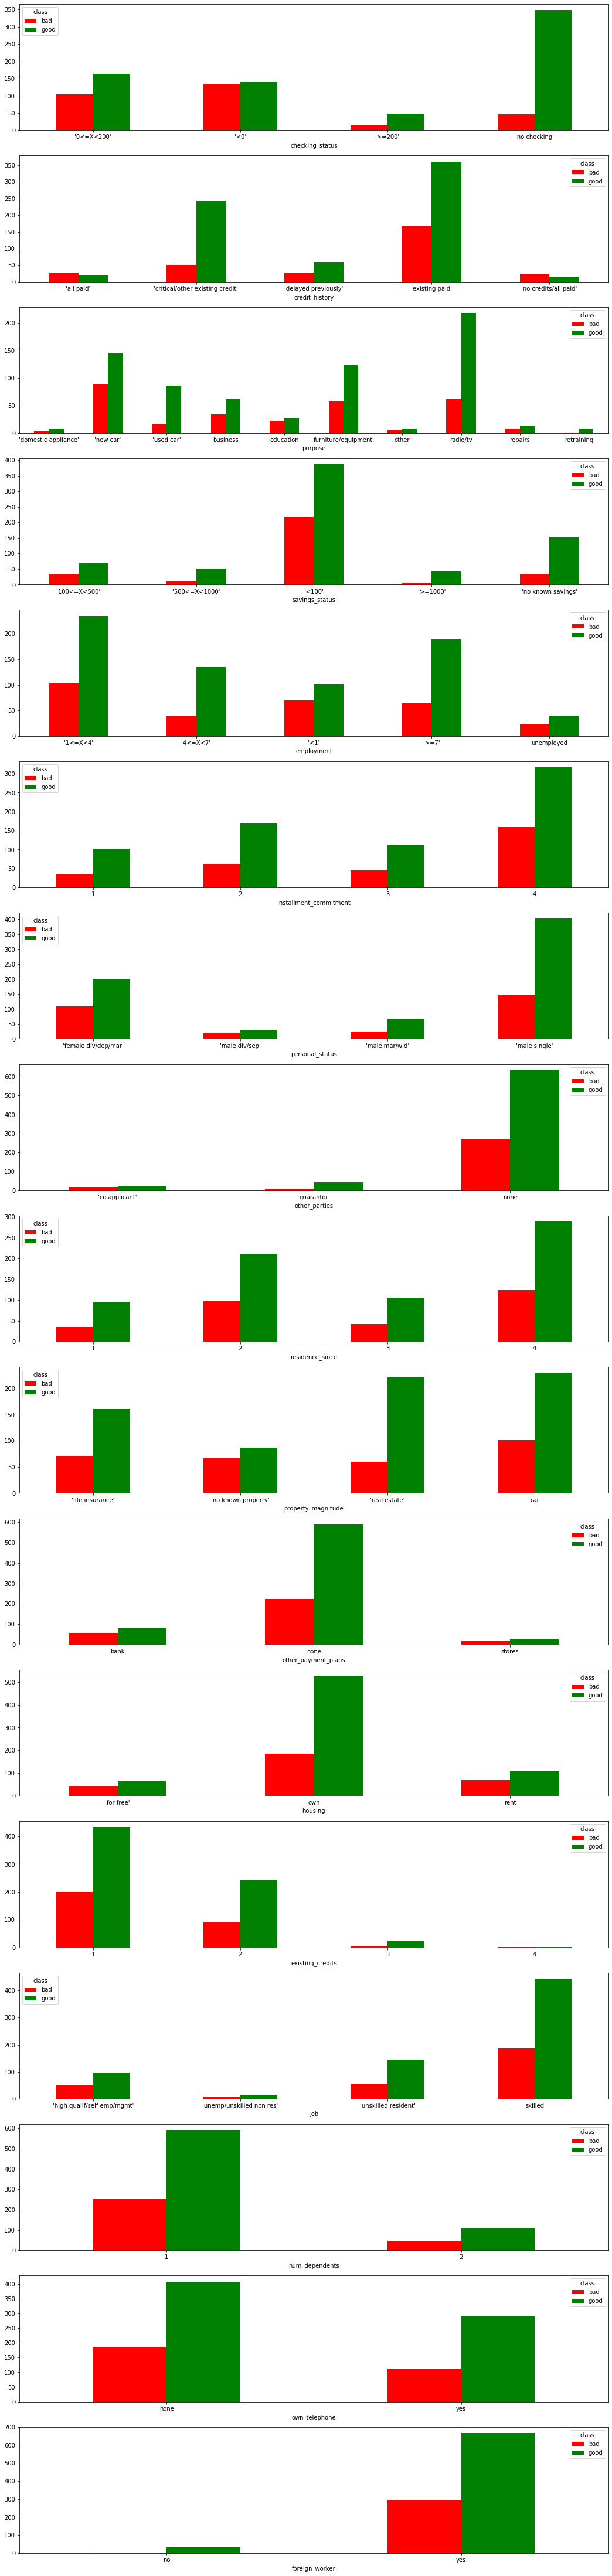

In [23]:
CategoricalColsList=['checking_status', 'credit_history', 'purpose','savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']


# Visual Inference using Grouped Bar chart
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(18,80))
# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=GermanCreditData[CategoricalCol], columns=GermanCreditData['class'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], rot=0)

In the "own_telephone" Vs "class" plot, The 0 vs 1 ratio for "yes" is similar to that of "no", it means own_telephone does not affect the Good/Bad Credit. Hence, these two variables are not correlated.

On the other hand, the "credit_history" vs "class" plot. The number of Bad Credits are very high if "credit_history"="existing paid" and "no credits/all paid". It means "credit_history" affects the Good/Bad Credit! Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables.

Hypothesis:
H0: The two columns are NOT related to each other.

Ha: The two columns are related to each other.

In [24]:
CategoricalColsList = GermanCreditData.select_dtypes(include = 'object').columns.values

for i in CategoricalColsList[:-1]:
    ct = pd.crosstab(GermanCreditData[i],GermanCreditData['class'])
    test_stats, p_val, dof, expected = chi2_contingency(ct)

    if(p_val < 0.05):
        SelectedPredictors.append(i)

print('Selected Predictors are',SelectedPredictors)

Selected Predictors are ['age', 'credit_amount', 'duration', 'checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'foreign_worker']


#### Inference:
Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'checking_status','credit_history','purpose',
  'savings_status',
  'employment',
  'personal_status',
  'other_parties',
  'property_magnitude',
  'other_payment_plans',
  'housing',
  'foreign_worker'

### Data Pre-processing for Machine Learning


In [25]:
DataForML = GermanCreditData[SelectedPredictors]

In [26]:
# Treating all the nominal variables at once using dummy variables
DataForML=pd.get_dummies(DataForML, drop_first=True)

# Printing sample rows
DataForML.head(10)

,age,credit_amount,duration,checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',...,other_parties_guarantor,other_parties_none,property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,foreign_worker_yes
0,67,1169,6,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1,22,5951,48,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
2,49,2096,12,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,1,0,1
3,45,7882,42,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
4,53,4870,24,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
5,35,9055,36,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
6,53,2835,24,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
7,35,6948,36,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,1
8,61,3059,12,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
9,28,5234,30,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,1,0,1


In [27]:
TargetVariable = DataForML.columns[-1:]
Predictors= DataForML.columns[:-1]

In [28]:
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

In [29]:
print('Shape of X before Sampling: ', X.shape, 'Shape of Y before Sampling: ', y.shape)

Shape of X before Sampling:  (1000, 39) Shape of Y before Sampling:  (1000, 1)


#### Transforming imbalanced data into balanced data using SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
s = SMOTE()
X,y = s.fit_resample(X,y)

In [31]:
print('Shape of X after Sampling: ', X.shape, 'Shape of Y after Sampling: ', y.shape)

Shape of X after Sampling:  (1926, 39) Shape of Y after Sampling:  (1926,)


In [32]:
print('Count of label 0 after over sampling: ', len(y[y==0]))
print('Count of label 1 after over sampling: ', len(y[y==1]))

Count of label 0 after over sampling:  963
Count of label 1 after over sampling:  963


In [33]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [34]:
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit_test = PredictorScaler.fit(X_test)
PredictorScalerFit_train = PredictorScaler.fit(X_train)

# Generating the standardized values of X
X_test = PredictorScalerFit_test.transform(X_test)
X_train = PredictorScalerFit_train.transform(X_train)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1348, 39)
(1348,)
(578, 39)
(578,)


### Applying different algorithms to find the model metrices and finalize the best model

### <u>Logistic Regression</u>

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_train, y_train, cv=3)

array([0.95555556, 0.9532294 , 0.95768374])

In [40]:
y_pred_train_log = log_reg.predict(X_train)
y_pred_test_log = log_reg.predict(X_test)

print('Train Accuarcy: ', accuracy_score(y_train, y_pred_train_log))
print('Test Accuarcy: ', accuracy_score(y_test, y_pred_test_log))

Train Accuarcy:  0.9636498516320475
Test Accuarcy:  0.9463667820069204


In [43]:
cm_log = confusion_matrix(y_test, y_pred_test_log)
display(cm_log)

y_score_log = cross_val_predict(log_reg, X_test, y_test, cv=3, method='decision_function')

array([[275,  10],
       [ 21, 272]], dtype=int64)

<Figure size 1296x576 with 0 Axes>

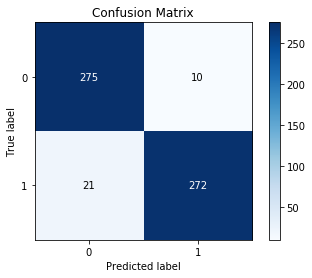

In [44]:
import scikitplot as skplt

plt.figure(figsize=(18,8))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_log)
plt.show()

In [45]:
alpha_error = cm_log[0][1]/(cm_log[0][0]+cm_log[0][1])
beta_error = cm_log[1][0]/(cm_log[1][0]+cm_log[1][1])

print('Alpha Error: ',alpha_error, '\nBeta Error: ', beta_error)

from sklearn.model_selection import cross_val_predict
y_pred_log = cross_val_predict(log_reg, X_train, y_train, cv=3)

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_train, y_pred_log))
print('Precision: ', precision_score(y_train, y_pred_log))
print('Recall: ', recall_score(y_train, y_pred_log))
print('F1: ', f1_score(y_train, y_pred_log))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(log_reg, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Alpha Error:  0.03508771929824561 
Beta Error:  0.07167235494880546
Accuracy:  0.9554896142433235
Precision:  0.9579579579579579
Recall:  0.9522388059701492
F1:  0.9550898203592814

Accuracy values for 10-fold Cross Validation:
 [0.79806282 0.9689019  0.91709845 0.96371888 0.89578529 0.93240286
 0.93224572 0.94789405 0.92182198 0.91658521]

Final Average Accuracy of the model: 0.92


In [46]:
sensitivity_of_model=cm_log[1][1]/(cm_log[1][0]+cm_log[1][1])
print("Sensitivity of the model: ", sensitivity_of_model*100 )

specificity_of_model=cm_log[0][0]/(cm_log[0][0]+cm_log[0][1])
print("Specificity of the model: ", specificity_of_model*100 )   

Sensitivity of the model:  92.83276450511946
Specificity of the model:  96.49122807017544


Area Under the Curve:  94.66199628764744


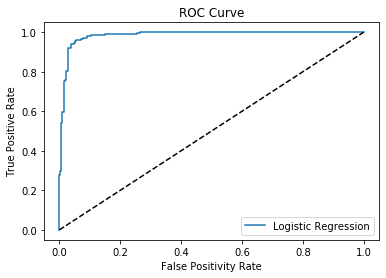

In [47]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

auc_log = metrics.roc_auc_score(y_test, y_pred_test_log)
print('Area Under the Curve: ', auc_log*100)

fpr_log, tpr_log, th_log = roc_curve(y_test, y_score_log)

plt.plot(fpr_log, tpr_log, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Inference from Logistic Regression:

- ROC Score comes to be 94%
- From Confusion Matrix we can see that beta error is slightly more as compared to alpha, but overall are satisfactory.
- The f1 score of the model comes to be 95%.
- Let's apply another algorithm.

### Naive-Bayes Algorithm

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(nb, X_train, y_train, cv=3)

array([0.85555556, 0.85300668, 0.87305122])

In [49]:
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)

print('Train Accuarcy: ', accuracy_score(y_train, y_pred_train_nb))
print('Test Accuarcy: ', accuracy_score(y_test, y_pred_test_nb))

Train Accuarcy:  0.862759643916914
Test Accuarcy:  0.8442906574394463


In [50]:
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
display(cm_nb)

y_score_nb = cross_val_predict(nb, X_test, y_test, cv=3, method='predict_proba')
y_score_nb = y_score_nb[:,-1]

array([[281,   4],
       [ 86, 207]], dtype=int64)

<Figure size 1296x576 with 0 Axes>

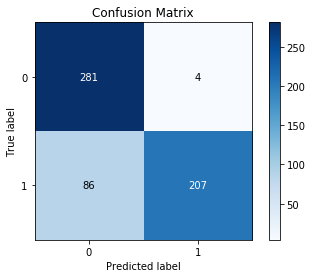

In [51]:
import scikitplot as skplt

plt.figure(figsize=(18,8))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_nb)
plt.show()

In [52]:
alpha_error = cm_nb[0][1]/(cm_nb[0][0]+cm_nb[0][1])
beta_error = cm_nb[1][0]/(cm_nb[1][0]+cm_nb[1][1])

print('Alpha Error: ',alpha_error, '\nBeta Error: ', beta_error)

from sklearn.model_selection import cross_val_predict
y_pred_nb = cross_val_predict(nb, X_train, y_train, cv=3)



print('Accuracy: ', accuracy_score(y_train, y_pred_nb))
print('Precision: ', precision_score(y_train, y_pred_nb))
print('Recall: ', recall_score(y_train, y_pred_nb))
print('F1: ', f1_score(y_train, y_pred_nb))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(nb, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Alpha Error:  0.014035087719298246 
Beta Error:  0.2935153583617747
Accuracy:  0.8605341246290801
Precision:  0.9839357429718876
Recall:  0.7313432835820896
F1:  0.839041095890411

Accuracy values for 10-fold Cross Validation:
 [0.84785273 0.92720324 0.93767328 0.94803302 0.90073858 0.8954123
 0.96871945 0.9109146  0.93206869 0.92139523]

Final Average Accuracy of the model: 0.92


In [53]:
sensitivity_of_model=cm_nb[1][1]/(cm_nb[1][0]+cm_nb[1][1])
print("Sensitivity of the model: ", sensitivity_of_model*100 )

specificity_of_model=cm_nb[0][0]/(cm_nb[0][0]+cm_nb[0][1])
print("Specificity of the model: ", specificity_of_model*100 )   

Sensitivity of the model:  70.64846416382252
Specificity of the model:  98.59649122807016


Area Under the Curve:  84.62247769594636


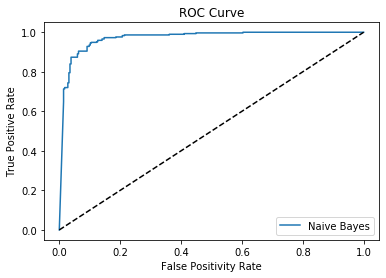

In [54]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

auc_nb = metrics.roc_auc_score(y_test, y_pred_test_nb)
print('Area Under the Curve: ', auc_nb*100)

fpr_nb, tpr_nb, th_nb = roc_curve(y_test, y_score_nb)

plt.plot(fpr_nb, tpr_nb, label = 'Naive Bayes')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Inference from Naive Bayes:

- ROC Score comes to be 84%
- From Confusion Matrix we can see that beta error is more as compared to alpha.
- The f1 score of the model comes to be 84%.

Logistic Regression's performance seems to be better than Naive Bayes. Let's check for Decsion Tree

### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(dtf, X_train, y_train, cv=3)

array([0.90444444, 0.9376392 , 0.94432071])

In [56]:
y_pred_train_dtf = dtf.predict(X_train)
y_pred_test_dtf = dtf.predict(X_test)

print('Train Accuarcy: ', accuracy_score(y_train, y_pred_train_dtf))
print('Test Accuarcy: ', accuracy_score(y_test, y_pred_test_dtf))

Train Accuarcy:  1.0
Test Accuarcy:  0.9377162629757786


In [57]:
cm_dtf = confusion_matrix(y_test, y_pred_test_dtf)
display(cm_dtf)

y_score_dtf = cross_val_predict(dtf, X_test, y_test, cv=3, method='predict_proba')
y_score_dtf = y_score_dtf[:,-1]

array([[278,   7],
       [ 29, 264]], dtype=int64)

<Figure size 1296x576 with 0 Axes>

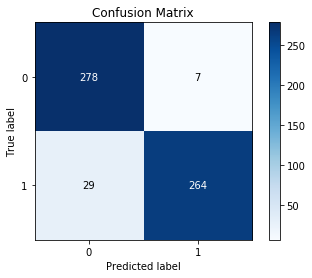

In [58]:
import scikitplot as skplt

plt.figure(figsize=(18,8))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dtf)
plt.show()

In [59]:
alpha_error = cm_dtf[0][1]/(cm_dtf[0][0]+cm_dtf[0][1])
beta_error = cm_dtf[1][0]/(cm_dtf[1][0]+cm_dtf[1][1])

print('Alpha Error: ',alpha_error, '\nBeta Error: ', beta_error)

y_pred_dtf = cross_val_predict(dtf, X_train, y_train, cv=3)

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_train, y_pred_dtf))
print('Precision: ', precision_score(y_train, y_pred_dtf))
print('Recall: ', recall_score(y_train, y_pred_dtf))
print('F1: ', f1_score(y_train, y_pred_dtf))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(dtf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Alpha Error:  0.02456140350877193 
Beta Error:  0.09897610921501707
Accuracy:  0.93026706231454
Precision:  0.95141065830721
Recall:  0.9059701492537313
F1:  0.9281345565749236

Accuracy values for 10-fold Cross Validation:
 [0.83265968 0.95853587 0.97408909 0.96887682 0.93770339 0.9428671
 0.96873643 0.9582926  0.95311355 0.95306261]

Final Average Accuracy of the model: 0.94


In [60]:
sensitivity_of_model=cm_dtf[1][1]/(cm_dtf[1][0]+cm_dtf[1][1])
print("Sensitivity of the model: ", sensitivity_of_model*100 )

specificity_of_model=cm_dtf[0][0]/(cm_dtf[0][0]+cm_dtf[0][1])
print("Specificity of the model: ", specificity_of_model*100 )   

Sensitivity of the model:  90.10238907849829
Specificity of the model:  97.54385964912281


Area Under the Curve:  93.82312436381055


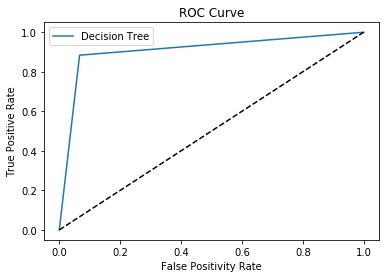

In [61]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

auc_dtf = metrics.roc_auc_score(y_test, y_pred_test_dtf)
print('Area Under the Curve: ', auc_dtf*100)

fpr_dtf, tpr_dtf, th_dtf = roc_curve(y_test, y_score_dtf)

plt.plot(fpr_dtf, tpr_dtf, label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Inference from Decision Tree Classifier:

- ROC Score comes to be 93%
- From Confusion Matrix we can see that beta error is slightly more as compared to alpha, but overall are satisfactory.
- The f1 score of the model comes to be 92%.

Decision Tree Classifier has also performed good, but again Logistic Regression seems to have better metrics scores. Lets apply Random Forest Classifier.

### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_train, y_train, cv=3)

array([0.94666667, 0.9688196 , 0.96436526])

In [63]:
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)

print('Train Accuarcy: ', accuracy_score(y_train, y_pred_train_rfc))
print('Test Accuarcy: ', accuracy_score(y_test, y_pred_test_rfc))

Train Accuarcy:  0.9977744807121661
Test Accuarcy:  0.9653979238754326


In [64]:
cm_rfc = confusion_matrix(y_test, y_pred_test_rfc)
display(cm_rfc)

y_score_rfc = cross_val_predict(rfc, X_test, y_test, cv=3, method='predict_proba')
y_score_rfc = y_score_rfc[:,-1]

array([[282,   3],
       [ 17, 276]], dtype=int64)

<Figure size 1296x576 with 0 Axes>

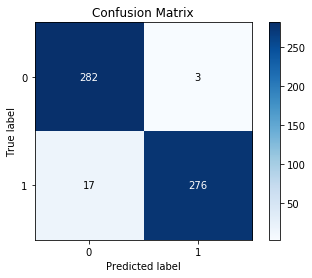

In [65]:
import scikitplot as skplt

plt.figure(figsize=(18,8))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_rfc)
plt.show()

In [66]:
alpha_error = cm_rfc[0][1]/(cm_rfc[0][0]+cm_rfc[0][1])
beta_error = cm_rfc[1][0]/(cm_rfc[1][0]+cm_rfc[1][1])

print('Alpha Error: ',alpha_error, '\nBeta Error: ', beta_error)

from sklearn.model_selection import cross_val_predict
y_pred_rfc = cross_val_predict(rfc, X_train, y_train, cv=3)

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_train, y_pred_rfc))
print('Precision: ', precision_score(y_train, y_pred_rfc))
print('Recall: ', recall_score(y_train, y_pred_rfc))
print('F1: ', f1_score(y_train, y_pred_rfc))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(rfc, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Alpha Error:  0.010526315789473684 
Beta Error:  0.05802047781569966
Accuracy:  0.9584569732937686
Precision:  0.9781931464174455
Recall:  0.9373134328358209
F1:  0.9573170731707318

Accuracy values for 10-fold Cross Validation:
 [0.88470968 0.97926793 0.97926793 0.98963564 0.98445095 0.96887682
 0.9895822  0.9895822  0.98437118 0.96871945]

Final Average Accuracy of the model: 0.97


In [67]:
sensitivity_of_model=cm_rfc[1][1]/(cm_rfc[1][0]+cm_rfc[1][1])
print("Sensitivity of the model: ", sensitivity_of_model*100 )

specificity_of_model=cm_rfc[0][0]/(cm_rfc[0][0]+cm_rfc[0][1])
print("Specificity of the model: ", specificity_of_model*100 )   

Sensitivity of the model:  94.19795221843003
Specificity of the model:  98.94736842105263


Area Under the Curve:  96.57266031974133


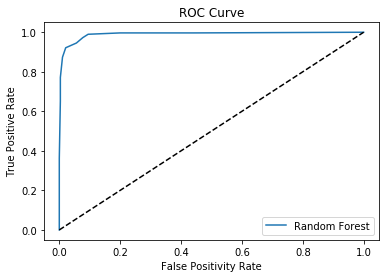

In [68]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

auc_rfc = metrics.roc_auc_score(y_test, y_pred_test_rfc)
print('Area Under the Curve: ', auc_rfc*100)

fpr_rfc, tpr_rfc, th_rfc = roc_curve(y_test, y_score_rfc)

plt.plot(fpr_rfc, tpr_rfc, label = 'Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Inference from Random Forest:

- ROC Score comes to be 96%
- From Confusion Matrix we can see that beta error is slightly more as compared to alpha, but overall the values are very satisfactory.
- The f1 score of the model comes to be 96%.

Random Forest seems to have done an amazing job as all the metrics score are higher than the rest of the models. Let's compare them.

### <u>Comparing all the four models

In [69]:
print('Area under the curve for all the four models: \n')
print('1. Logistic Regression model: ', auc_log)
print('2. Naive Bayes model: ', auc_nb)
print('3. Decision Tree model: ', auc_dtf)
print('4. Random Forest model: ', auc_rfc)

Area under the curve for all the four models: 

1. Logistic Regression model:  0.9466199628764744
2. Naive Bayes model:  0.8462247769594635
3. Decision Tree model:  0.9382312436381055
4. Random Forest model:  0.9657266031974133


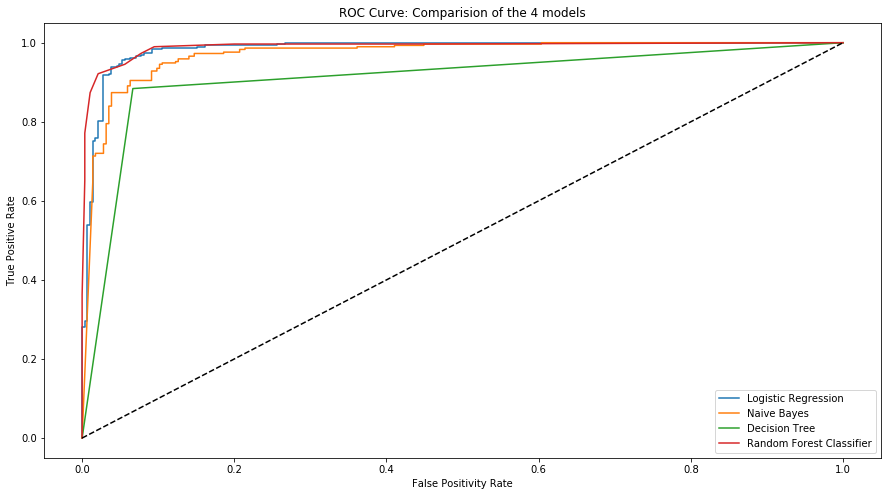

In [70]:
plt.figure(figsize=(15,8))
plt.plot(fpr_log, tpr_log, label = 'Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label = 'Naive Bayes')
plt.plot(fpr_dtf, tpr_dtf, label = 'Decision Tree')
plt.plot(fpr_rfc, tpr_rfc, label = 'Random Forest Classifier')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Comparision of the 4 models')
plt.legend()
plt.show()

Random Forest Classifier has the highest value for Area under the curve, This model seems to have the best fit for our data.

Random Forest will be considered as the final model for the German Credit Dataset.

##### Top 5 attributes affecting the target

In [75]:
X = pd.DataFrame(X,columns = DataForML.columns[:-1])

In [78]:
fimp = pd.DataFrame(dtf.feature_importances_, columns=['FEATURE IMP'])
fimp['Features'] = X.columns

In [79]:
print('Top 5 features: ', list(fimp.sort_values(by = 'FEATURE IMP', ascending=False)['Features'][:5]))

Top 5 features:  ['duration', 'other_parties_none', 'age', 'purpose_radio/tv', 'property_magnitude_car']


The variables which affects the Target variables the most are: <br>
1.) 'duration', <br>
2.) 'other_parties_none', <br>
3.) 'age', <br>
4.) 'purpose_radio/tv', <br>
5.)'property_magnitude_car' 